<a href="https://colab.research.google.com/github/jrobledob/AI_in_Plant_Pathology_Fall_2025/blob/main/Pandas_Plant_Health_Tutorial_with_Exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Pandas Basics with Plant Health Data (Colab Tutorial)

**Dataset:** `/content/plant_health_data(in).csv

This notebook introduces essential **pandas** operations on a plant‑health dataset: reading and inspecting data,
filtering/selecting, creating new columns, grouping/aggregating, handling time, dealing with missing values,
reshaping, and plotting with Matplotlib.

**How to use this notebook**
- Work through Sections 0–10 to learn/review the basics.
- At the **very end**, you'll find **10 exercises**. Each has an empty code cell for you to try and a **hidden answer**.
  Click the small triangle to reveal an answer if you need it.


## 0) Setup
Import core libraries.

In [86]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.options.display.float_format = "{:,.3f}".format



## 1) Load and preview the data

**Goal:** Read the CSV into a `DataFrame` and preview its structure.


##  Dataset Source — Live on Kaggle

You can explore the dataset on Kaggle here:  
https://www.kaggle.com/datasets/ziya07/plant-health-data

We’ll download this data set from the Class Github repository:

https://github.com/jrobledob/AI_in_Plant_Pathology_Fall_2025/tree/main/Data


In [87]:
csv_path = "https://raw.githubusercontent.com/jrobledob/AI_in_Plant_Pathology_Fall_2025/refs/heads/main/Data/plant_health_data.csv"
df = pd.read_csv(csv_path)
print("Shape:", df.shape)
display(df.head())
print("\nInfo:"); print(df.info())
print("\nDescribe (numeric):"); display(df.describe())

Shape: (1200, 14)


,Timestamp,Plant_ID,Soil_Moisture,Ambient_Temperature,Soil_Temperature,Humidity,Light_Intensity,Soil_pH,Nitrogen_Level,Phosphorus_Level,Potassium_Level,Chlorophyll_Content,Electrochemical_Signal,Plant_Health_Status
0,2024-10-03 10:54:53.407995,1,27.521,22.240,21.900,55.292,556.173,5.582,10.004,45.807,39.076,35.703,0.941,High Stress
1,2024-10-03 16:54:53.407995,1,14.836,21.707,18.681,63.949,596.137,7.136,30.713,25.394,17.945,27.993,0.165,High Stress
2,2024-10-03 22:54:53.407995,1,17.086,21.181,15.393,67.838,591.125,5.657,29.337,27.574,35.707,43.646,1.082,High Stress
3,2024-10-04 04:54:53.407995,1,15.336,22.593,22.778,58.191,241.412,5.585,16.967,26.181,26.258,37.838,1.186,High Stress
4,2024-10-04 10:54:53.407995,1,39.822,28.929,18.101,63.772,444.494,5.920,10.945,37.899,37.654,48.266,1.610,High Stress



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Timestamp               1200 non-null   object 
 1   Plant_ID                1200 non-null   int64  
 2   Soil_Moisture           1200 non-null   float64
 3   Ambient_Temperature     1200 non-null   float64
 4   Soil_Temperature        1200 non-null   float64
 5   Humidity                1200 non-null   float64
 6   Light_Intensity         1200 non-null   float64
 7   Soil_pH                 1200 non-null   float64
 8   Nitrogen_Level          1200 non-null   float64
 9   Phosphorus_Level        1200 non-null   float64
 10  Potassium_Level         1200 non-null   float64
 11  Chlorophyll_Content     1200 non-null   float64
 12  Electrochemical_Signal  1200 non-null   float64
 13  Plant_Health_Status     1200 non-null   object 
dtypes: float64(11), int64(1), object(

,Plant_ID,Soil_Moisture,Ambient_Temperature,Soil_Temperature,Humidity,Light_Intensity,Soil_pH,Nitrogen_Level,Phosphorus_Level,Potassium_Level,Chlorophyll_Content,Electrochemical_Signal
count,"1,200.000","1,200.000","1,200.000","1,200.000","1,200.000","1,200.000","1,200.000","1,200.000","1,200.000","1,200.000","1,200.000","1,200.000"
mean,5.500,25.107,23.999,19.958,54.853,612.637,6.524,30.107,30.264,30.112,34.750,0.988
std,2.873,8.678,3.442,2.932,8.785,228.319,0.582,11.514,11.467,11.668,8.767,0.575
min,1.000,10.001,18.002,15.004,40.029,200.615,5.507,10.004,10.018,10.001,20.026,0.002
25%,3.000,17.132,21.102,17.353,47.020,416.879,6.026,20.250,20.894,19.586,27.463,0.488
50%,5.500,25.168,23.889,19.911,54.692,617.240,6.541,30.139,30.019,30.495,34.433,0.982
75%,8.000,32.370,27.043,22.597,62.451,811.475,7.030,40.185,40.131,40.108,42.233,1.473
max,10.000,39.993,29.991,24.996,69.969,999.856,7.498,49.951,49.981,49.982,49.991,1.996



## 2) Select columns & filter rows

Pick a subset of columns and filter rows using boolean masks.


In [88]:

cols = ["Plant_ID","Soil_Moisture","Light_Intensity","Chlorophyll_Content","Plant_Health_Status"]
subset = df[cols]
display(subset.head())

bright = subset[subset["Light_Intensity"] > subset["Light_Intensity"].median()]
print("Rows with Light_Intensity above median:", bright.shape[0])
display(bright.head())


,Plant_ID,Soil_Moisture,Light_Intensity,Chlorophyll_Content,Plant_Health_Status
0,1,27.521,556.173,35.703,High Stress
1,1,14.836,596.137,27.993,High Stress
2,1,17.086,591.125,43.646,High Stress
3,1,15.336,241.412,37.838,High Stress
4,1,39.822,444.494,48.266,High Stress


Rows with Light_Intensity above median: 600


,Plant_ID,Soil_Moisture,Light_Intensity,Chlorophyll_Content,Plant_Health_Status
8,1,12.723,635.057,47.750,High Stress
11,1,31.607,763.538,49.125,Healthy
13,1,21.535,724.148,27.397,Moderate Stress
16,1,22.281,800.727,40.236,Moderate Stress
20,1,37.397,735.682,29.214,Healthy



## 3) Group and aggregate

Compare sensor means across `Plant_Health_Status`.


In [89]:

metrics = ["Soil_Moisture","Ambient_Temperature","Soil_Temperature","Humidity",
           "Light_Intensity","Soil_pH","Nitrogen_Level","Phosphorus_Level",
           "Potassium_Level","Chlorophyll_Content","Electrochemical_Signal"]
group_means = df.groupby("Plant_Health_Status")[metrics].mean().round(3)
group_means


,Soil_Moisture,Ambient_Temperature,Soil_Temperature,Humidity,Light_Intensity,Soil_pH,Nitrogen_Level,Phosphorus_Level,Potassium_Level,Chlorophyll_Content,Electrochemical_Signal
Plant_Health_Status,,,,,,,,,,,
Healthy,34.906,23.967,19.928,55.365,603.463,6.501,34.792,31.404,31.232,34.969,0.965
High Stress,18.085,23.975,19.890,54.402,618.669,6.555,26.972,29.656,30.270,34.759,0.998
Moderate Stress,26.556,24.053,20.065,55.034,611.957,6.503,30.522,30.174,29.080,34.574,0.992



## 4) Correlation matrix

Compute and visualize correlations among numeric variables.


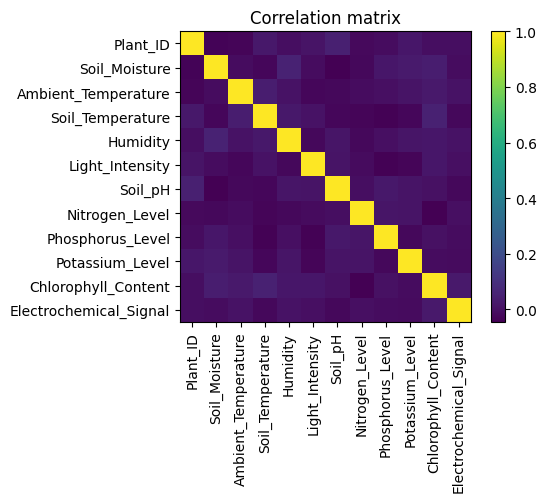

,Plant_ID,Soil_Moisture,Ambient_Temperature,Soil_Temperature,Humidity,Light_Intensity,Soil_pH,Nitrogen_Level,Phosphorus_Level,Potassium_Level,Chlorophyll_Content,Electrochemical_Signal
Plant_ID,1.000,-0.034,-0.030,0.023,-0.005,0.009,0.047,-0.020,-0.011,0.017,-0.008,-0.005
Soil_Moisture,-0.034,1.000,-0.009,-0.027,0.054,-0.009,-0.044,-0.025,0.019,0.031,0.039,-0.011
Ambient_Temperature,-0.030,-0.009,1.000,0.037,0.004,-0.025,-0.021,-0.012,-0.001,0.011,0.027,0.007
Soil_Temperature,0.023,-0.027,0.037,1.000,0.023,0.004,-0.025,-0.033,-0.040,-0.026,0.051,-0.024
Humidity,-0.005,0.054,0.004,0.023,1.000,-0.024,0.014,-0.023,-0.003,0.012,0.019,0.007


In [90]:

numeric = df.select_dtypes(include=[np.number])
corr = numeric.corr()

plt.figure(figsize=(6,5))
plt.imshow(corr, interpolation="nearest")
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.colorbar()
plt.title("Correlation matrix")
plt.tight_layout()
plt.show()

corr.head()



## 5) Missing values

Check missingness and do a simple numeric imputation.


In [91]:

na_counts = df.isna().sum().sort_values(ascending=False)
display(na_counts)

df_filled = df.copy()
for col in df_filled.select_dtypes(include=[np.number]).columns:
    df_filled[col] = df_filled[col].fillna(df_filled[col].median())
df_filled.isna().sum().head()


,0
Timestamp,0
Plant_ID,0
Soil_Moisture,0
Ambient_Temperature,0
Soil_Temperature,0
Humidity,0
Light_Intensity,0
Soil_pH,0
Nitrogen_Level,0
Phosphorus_Level,0


,0
Timestamp,0
Plant_ID,0
Soil_Moisture,0
Ambient_Temperature,0
Soil_Temperature,0



## 6) Reshape with pivot tables

Build a small pivot table of mean `Chlorophyll_Content` by status and plant.


In [92]:

some_plants = df["Plant_ID"].dropna().unique()[:5]
pivot_ex = df[df["Plant_ID"].isin(some_plants)].pivot_table(
    index="Plant_Health_Status",
    columns="Plant_ID",
    values="Chlorophyll_Content",
    aggfunc="mean"
)
pivot_ex


Plant_ID,1,2,3,4,5
Plant_Health_Status,,,,,
Healthy,35.641,33.475,33.723,36.252,36.393
High Stress,35.791,34.262,33.335,38.245,34.421
Moderate Stress,33.647,36.259,34.639,35.651,35.914



## (Optional) Save a subset

Export a small processed subset as CSV.


In [93]:
export_cols = ["Timestamp","Plant_ID","Chlorophyll_Content","Plant_Health_Status"]
out_path = "/content/plant_health_processed_subset.csv"
df[export_cols].to_csv(out_path, index=False)
print("Saved:", out_path)

Saved: /content/plant_health_processed_subset.csv



---

# 📚 Exercises (with hidden answers)

Each exercise has:
- a **task description**
- a **student code** cell (empty template)
- a **hidden answer** code cell (collapsed by default)

Try to solve the task first, then expand the answer if needed.



### Exercise 1 — Filter by condition
**Goal:** Create a DataFrame with rows where `Soil_Moisture` is **below** its median **and** `Plant_Health_Status` is not `"Healthy"`. Show first 5 rows and the number of rows.


In [ ]:
# Your solution here

In [ ]:
# @title Answer — Exercise 1

mo_med = df["Soil_Moisture"].median()
result1 = df[(df["Soil_Moisture"] < mo_med) & (df["Plant_Health_Status"] != "Healthy")]
display(result1.head())
print("Rows:", result1.shape[0])



### Exercise 2 — Time‑window mean
**Goal:** From `df_time`, select a **3‑day** window starting at the earliest timestamp and compute the **mean** `Chlorophyll_Content`.


In [ ]:
# Your solution here

In [ ]:
# @title Answer — Exercise 2
df_time = df.copy()
df_time['Timestamp'] = pd.to_datetime(df_time['Timestamp'])
df_time = df_time.set_index('Timestamp')

start = df_time.index.min()
end = start + pd.Timedelta(days=3)
mean_chl = df_time.loc[start:end, "Chlorophyll_Content"].mean()
mean_chl


### Exercise 3 — Top features by status
**Goal:** Using `group_means`, list the top **three** features with the highest mean per `Plant_Health_Status`.


In [ ]:
# Your solution here

In [ ]:
# @title Answer — Exercise 3

summary = {}
for status, row in group_means.iterrows():
    summary[status] = row.sort_values(ascending=False).head(3).index.tolist()
summary



### Exercise 4 — Mini report
**Goal:** Print a 3‑line summary:
1) total rows and number of plants;  
2) mean `Chlorophyll_Content` by `Plant_Health_Status`;  
3) strongest absolute correlation among numeric variables.


In [ ]:
# Your solution here

In [ ]:
# @title Answer — Exercise 4

total = len(df)
n_plants = df["Plant_ID"].nunique()
mean_chl_by_status = df.groupby("Plant_Health_Status")["Chlorophyll_Content"].mean()

numeric = df.select_dtypes(include=[np.number]).corr().abs()
np.fill_diagonal(numeric.values, np.nan)
strongest_pair = numeric.unstack().dropna().idxmax()
strongest_value = numeric.unstack().dropna().max()

print(f"Total rows: {total}; # plants: {n_plants}")
print("Mean Chlorophyll by status:\n", mean_chl_by_status.round(3))
print(f"Strongest correlation: {strongest_pair} = {strongest_value:.3f}")
